In [80]:
#pip install matplotlib-venn
#pip install venn
#!pip install spotipy

In [68]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import spotipy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="04a4497f95c54a0aa7ce2279b17eea48",
                                                           client_secret="df521df1fbbd4b9980294f633e174675"))
# OR
#client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
#sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# OR
#client_id = '' #insert your client id
#client_secret = '' # insert your client secret id here
#client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
#sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [2]:
# Created a funtion to spit dataframe when playlist id is fed so that we can compare different playlist down the line

def compare_playlist(playlist_id):
    results = sp.playlist(playlist_id)
    ids=[]
    for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
    #ids 
    song_name=[]
    for item in ids:
        song_name_ = sp.track(item)['name'] 
        song_name.append(song_name_)

    # check the song feature
    features = sp.audio_features(ids)
    # change dictionary to dataframe
    features_df=pd.DataFrame.from_dict(features)
    # combine two list + features
    song_demo = pd.DataFrame({'id': ids,'song_name': song_name})
    final_df=song_demo.merge(features_df)
    return(final_df)
    #music_features = final_df[['danceability','loudness','speechiness','acousticness','instrumentalness',
    #'liveness','valence','tempo','energy','key']]
    #return(music_features)
    

#south korea - 37i9dQZEVXbJZGli0rRP3r
#India - 37i9dQZEVXbMWDif5SCBJq
#USA - 37i9dQZEVXbLp5XoPON0wI
#Pakistan - 37i9dQZEVXbNy9tB5elXf1
#South Africa - 37i9dQZEVXbJV3H3OfCN1z
#Global - 37i9dQZEVXbMDoHDwVN2tF

In [69]:
feat_df_Skorea = compare_playlist("37i9dQZEVXbJZGli0rRP3r")
feat_df_Safrica = compare_playlist("37i9dQZEVXbJV3H3OfCN1z")
feat_df_usa = compare_playlist("37i9dQZEVXbLp5XoPON0wI")
feat_df_india = compare_playlist("37i9dQZEVXbMWDif5SCBJq")
feat_df_global = compare_playlist("37i9dQZEVXbMDoHDwVN2tF")

#feat_df_pakistan = compare_playlist("37i9dQZEVXbNy9tB5elXf1")

In [7]:
from sklearn import preprocessing
feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(feat_df_Skorea.median(), ignore_index=True)
mean_vals = mean_vals.append(feat_df_Safrica.median(), ignore_index=True)
mean_vals = mean_vals.append(feat_df_usa.median(), ignore_index=True)
mean_vals = mean_vals.append(feat_df_india.median(), ignore_index=True)

import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='South Korea'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='South Africa'),
        go.Scatterpolar(r=mean_vals.iloc[2], theta=feat_cols, fill='toself', name='USA'),
        go.Scatterpolar(r=mean_vals.iloc[3], theta=feat_cols, fill='toself', name='India'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

fig.write_image(file='RadarChart.png', format='png')
fig.show()

#Taking median for the better representation of the distribution(Did try mean --> Not much differnece between the two)


High in energy, danceability, valence
accoustic --> india high (accousticness is imp)
valence --> high in south korea
danceability --> south africa high
energy --> south korea high
overall speechiness, liveness and instrumentalness low


#curious about accousticness dist, energy, valence


In [ ]:
## Density distribution 

In [8]:
feat_df_Skorea["Playlist_name"] = "South Korea"
feat_df_Safrica["Playlist_name"] = "South Africa"
feat_df_usa["Playlist_name"] = "USA"
feat_df_india["Playlist_name"] = "India"
res = pd.concat([feat_df_Skorea,feat_df_Safrica,feat_df_usa,feat_df_india])

In [9]:
#Creating a function for density plot for other left out features - 
def feature_densityPlt(feature):
    playlist_names  = ['South Korea', 'South Africa', 'USA','India']
    # Iterate through the 4 playlist
    for playlist_name in playlist_names:
        # Subset to the playlist
        subset = res[res['Playlist_name'] == playlist_name]
    
        # Draw the density plot
        sns.distplot(subset[feature], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = playlist_name)
    # Plot formatting
    plt.legend(prop={'size': 9}, title = 'playlist_names')
    plt.title('Density Plot for '+feature+' across different playlists')
    plt.xlabel(feature)
    plt.savefig('DensityPlot_'+feature+'.png')

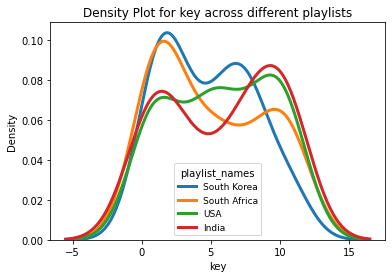

In [10]:
feature_densityPlt('key')

most insteresting distribution is of USA. Top 50 songs in USA have a diverse distribution and no one favorite key. For other countries we see bimodal distribution
USA - 
Overall two keys that are popular across 4 countries are - 1(C♯/D♭), 10(A♯, B♭)


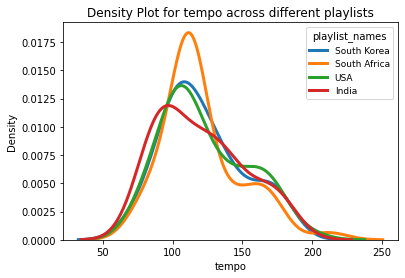

In [11]:
feature_densityPlt('tempo')

South africa stood out in above graph; top 50 songs in South africa centers around 110 beats per minute
For other playlists we can see bimodal distribution - one peak observed around 110 and another one around 160


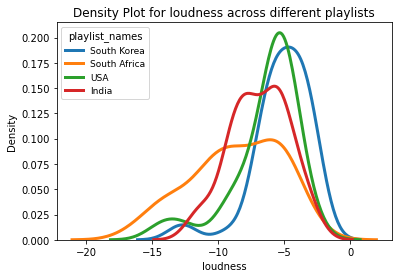

In [12]:
feature_densityPlt('loudness')

South africa and india are a little more diverse in terms of loudness in comparison to south korea and USA which mainly centers around (-8,-2)dB

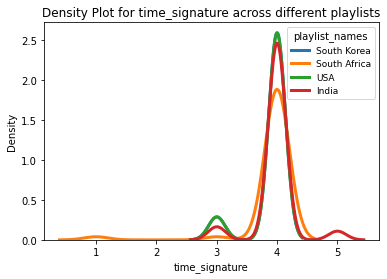

In [13]:
#feature_densityPlt('time_signature')

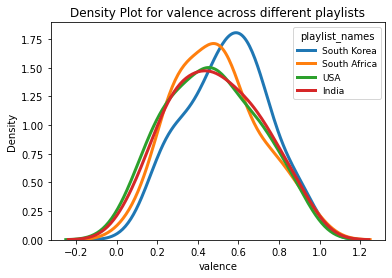

In [16]:
feature_densityPlt('valence')

clearly south korea has more positivity in therew top 50 songs compared to other 3 countries

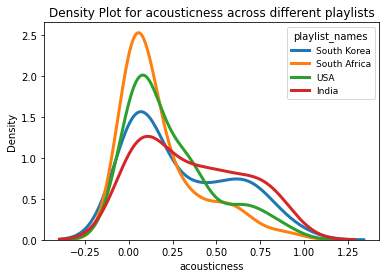

In [18]:
feature_densityPlt('acousticness')

least accoustic -South africa; India the morst acoustic as we see more diverseness in terms of that feature

In [ ]:
# Venn diagram

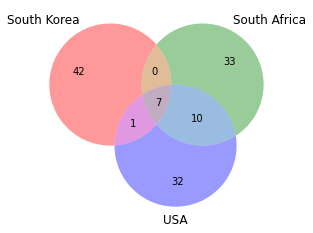

In [40]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

set_Skorea = set(feat_df_Skorea["song_name"])
set_Safrica = set(feat_df_Safrica["song_name"])
set_usa = set(feat_df_usa["song_name"])
set_india = set(feat_df_india["song_name"])

venn3([set_Skorea, set_Safrica, set_usa], ('South Korea', 'South Africa', 'USA'))
#venn3([set1, set2, set3], ('Group1', 'Group2', 'Group3'))
plt.show()

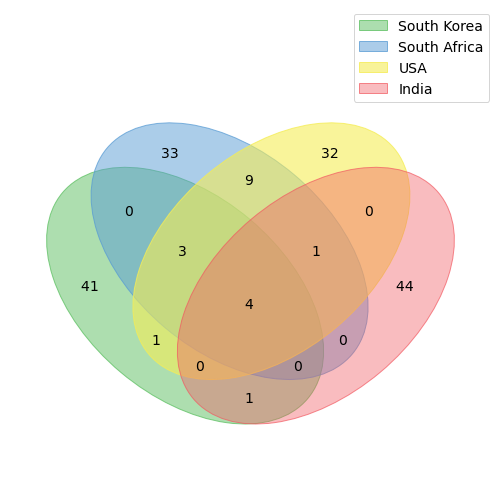

In [55]:
import matplotlib
matplotlib.use('Agg')

import venn

set_Skorea = set(feat_df_Skorea["song_name"])
set_Safrica = set(feat_df_Safrica["song_name"])
set_usa = set(feat_df_usa["song_name"])
set_india = set(feat_df_india["song_name"])

labels = venn.get_labels([set_Skorea, set_Safrica, set_usa, set_india], fill = ['number'])
fig, ax = venn.venn4(labels, names=['South Korea', 'South Africa', 'USA', 'India'])
fig.show()

In [65]:

set_usa.intersection(set_Skorea, set_Safrica,set_india)

{'As It Was',
 'Glimpse of Us',
 'Left and Right (Feat. Jung Kook of BTS)',
 'STAY (with Justin Bieber)'}

In [ ]:
# CORR HEATMAP FOR GLOBAL

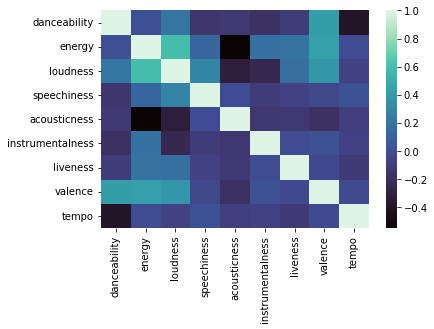

In [73]:
feat_global_num = feat_df_global.select_dtypes(include=[np.float])
sns.heatmap(feat_global_num.corr(),cmap='mako')
plt.show()

Negative corr between danceability and tempo
negative corr between energy and accousticness -> makes sense
Positive corr between energy and loudness

In [ ]:
# CORR HEATMAP FOR COUNTRIES COMPARISON 

In [75]:
feat_Skorea_num = feat_df_Skorea.select_dtypes(include=[np.float])
feat_Safrica_num = feat_df_Safrica.select_dtypes(include=[np.float])
feat_usa_num = feat_df_usa.select_dtypes(include=[np.float])
feat_india_num = feat_df_india.select_dtypes(include=[np.float])
res_num = res.select_dtypes(include=[np.float])

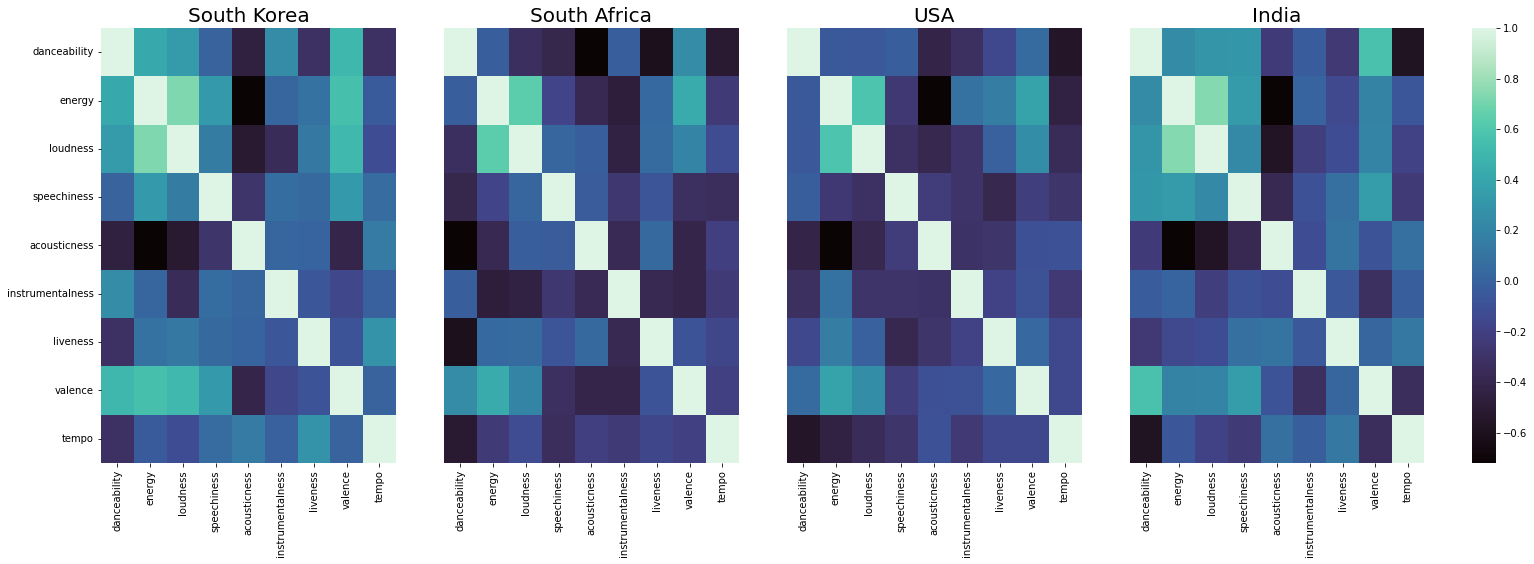

In [79]:
f,(ax1,ax2,ax3, ax4, axcb) = plt.subplots(1,5, figsize=(25,8),
            gridspec_kw={'width_ratios':[1,1,1,1,0.08]})
ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(feat_Skorea_num.corr(),cmap='mako',cbar=False,ax=ax1)
g1.set_title('South Korea', fontsize=20)
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(feat_Safrica_num.corr(),cmap='mako',cbar=False,ax=ax2)
g2.set_title('South Africa', fontsize=20)
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])
g3 = sns.heatmap(feat_usa_num.corr(),cmap='mako',ax=ax3, cbar_ax=axcb)
g3.set_title('USA', fontsize=20)
g3.set_ylabel('')
g3.set_xlabel('')
g3.set_yticks([])
g4 = sns.heatmap(feat_india_num.corr(),cmap='mako',ax=ax4, cbar_ax=axcb)
g4.set_title('India', fontsize=20)
g4.set_ylabel('')
g4.set_xlabel('')
g4.set_yticks([])

# rotate the ticklabels correctly:
for ax in [g1,g2,g3,g4]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
plt.savefig('CorrHeatmap_acrossDiffPlaylists.png')
plt.show()

Danceability is positively correlated with energy and loudness in S.Korea and India (0.4-0.6)
Again speechiness is positively corrrelated with energy in South Korea and India but not really in USA or South Africa

Dancebaility negatively correlated with accousticness and liveability in africa (not seen in other countries or globally); similarly we don't see much negative corr b/w acousticness and energy
Positive corr b/w loudness and energy is same across diff countries(as it was also found globally)


## APPENDIX

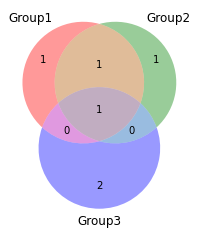

In [38]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

set1 = set(['A', 'B', 'C'])
set2 = set(['A', 'B', 'D'])
set3 = set(['A', 'E', 'F'])

venn3([set1, set2, set3], ('Group1', 'Group2', 'Group3'))

plt.show()